In [23]:
import numpy as np, pandas as pd , warnings
import matplotlib.pyplot as plt, seaborn as sns

##### Get Datasets

In [2]:
df = pd.read_csv('ml-100k/u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])

In [12]:
movies_titles= pd.read_csv('ml-100k/u.item',sep='\|',encoding='ISO-8859-1',header=None)
movies_titles = movies_titles[[0,1]]
movies_titles.columns = ['item_id','Titles']


C:\Users\admin\AppData\Local\Temp\ipykernel_9928\2275937987.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_titles= pd.read_csv('ml-100k/u.item',sep='\|',encoding='ISO-8859-1',header=None)


In [14]:
df=pd.merge(df,movies_titles)


##### Exploratory analysis

In [25]:
df.groupby('Titles').mean()['rating']
df.groupby('Titles').count()['rating'] #no of times each movies has been watched

ratings = pd.DataFrame(df.groupby('Titles').mean()['rating'])
ratings['No of times Watched'] = pd.DataFrame(df.groupby('Titles').count()['rating'])
ratings.sort_values(by='rating',ascending=False)

,rating,No of times Watched
Titles,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


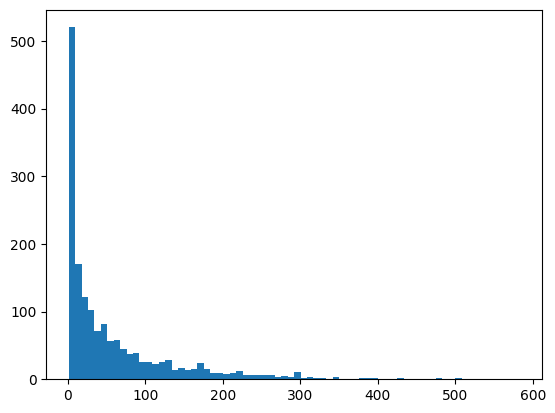

In [30]:
plt.hist(ratings['No of times Watched'],bins=70)
plt.show()

# after a certain point the people watching a certain movie is decreasing

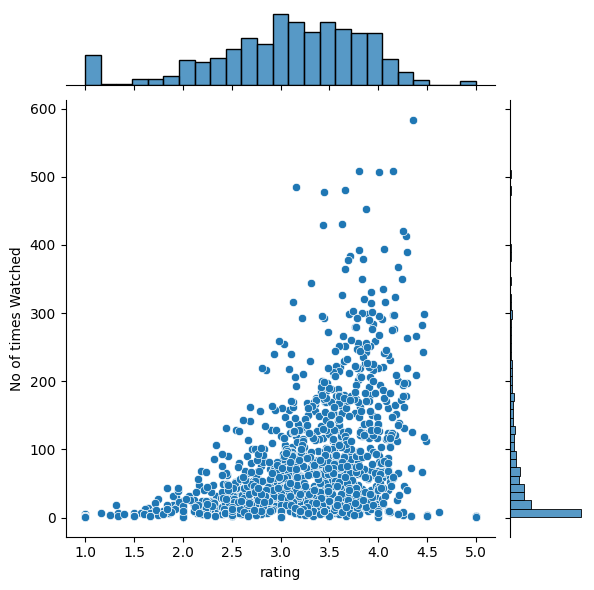

In [31]:
sns.jointplot(x=ratings['rating'],y=ratings['No of times Watched'],data=ratings)

#### Creating a Movie Recommendation

In [32]:
df.head()

,user_id,item_id,rating,timestamp,Titles
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [34]:
moviematrix = df.pivot_table(columns='Titles', index='user_id', values='rating')
moviematrix

Titles,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ratings.sort_values(by='No of times Watched', ascending=False).head()

,rating,No of times Watched
Titles,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [39]:
#taking Star Wars (1977) as example as it the highest rated movie
starwars_ratings= moviematrix['Star Wars (1977)']
starwars_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [43]:
#Correlation of star wars with other movies
similar_to_starwars=moviematrix.corrwith(starwars_ratings)
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [44]:
#drop the NaN values
corr_starwars.dropna(inplace=True)
corr_starwars

,Correlation
Titles,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [49]:
#join the two tables - corr_starwars and ratings
corr_starwars = corr_starwars.join(ratings['No of times Watched'])

In [50]:
#adding a threshold point from where the no pf people watching the movie decreases
corr_starwars[corr_starwars['No of times Watched']>100].sort_values('Correlation',ascending=False)

,Correlation,No of times Watched
Titles,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


#### Predict a generalized movie recommendation

In [51]:
def predict_movie(movie_name):
    movie_ratings = moviematrix[movie_name]
    similar_to_movie = moviematrix.corrwith(movie_ratings)

    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)

    corr_movie = corr_movie.join(ratings['No of times Watched'])
    predictions= corr_movie[corr_movie['No of times Watched']>100].sort_values('Correlation',ascending=False)

    return predictions

    

    

In [53]:
predict_movie('Titanic (1997)').head()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,No of times Watched
Titles,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
